# medical insurance dataset 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore, skew
#to avaid warning 

import warnings 
warnings.filterwarnings(action='ignore')

## Problem Statement

## Data Gathering 

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1. Age

In [5]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

### 2. Sex

In [6]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
sex_value = {'male':0,'female':1}

In [9]:
df['sex'].replace({'male':0,'female':1},inplace=True)

In [10]:
df.info("sex")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


### 3. bmi

In [11]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

### 4. children

In [12]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

### 5. smoker

In [13]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [14]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [15]:
smoker_value = {'yes':0,'no':1}

In [16]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)

In [17]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

<AxesSubplot: >

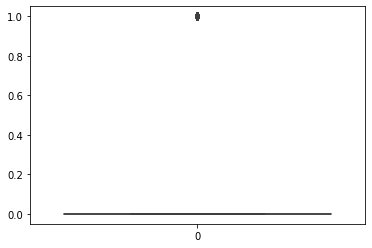

In [18]:
sns.boxplot(df['smoker'])

### 6. region

In [19]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [20]:
df=pd.get_dummies(df,columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


### 7. charges

In [21]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<AxesSubplot: >

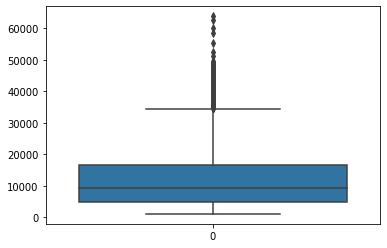

In [22]:
sns.boxplot(df['charges'])

In [23]:

df['charges'].isna().sum()  

0

In [24]:
df['charges'].fillna(df['charges'].mode()[0], inplace=True)


## feature Engineering

### delete outlier

<AxesSubplot: >

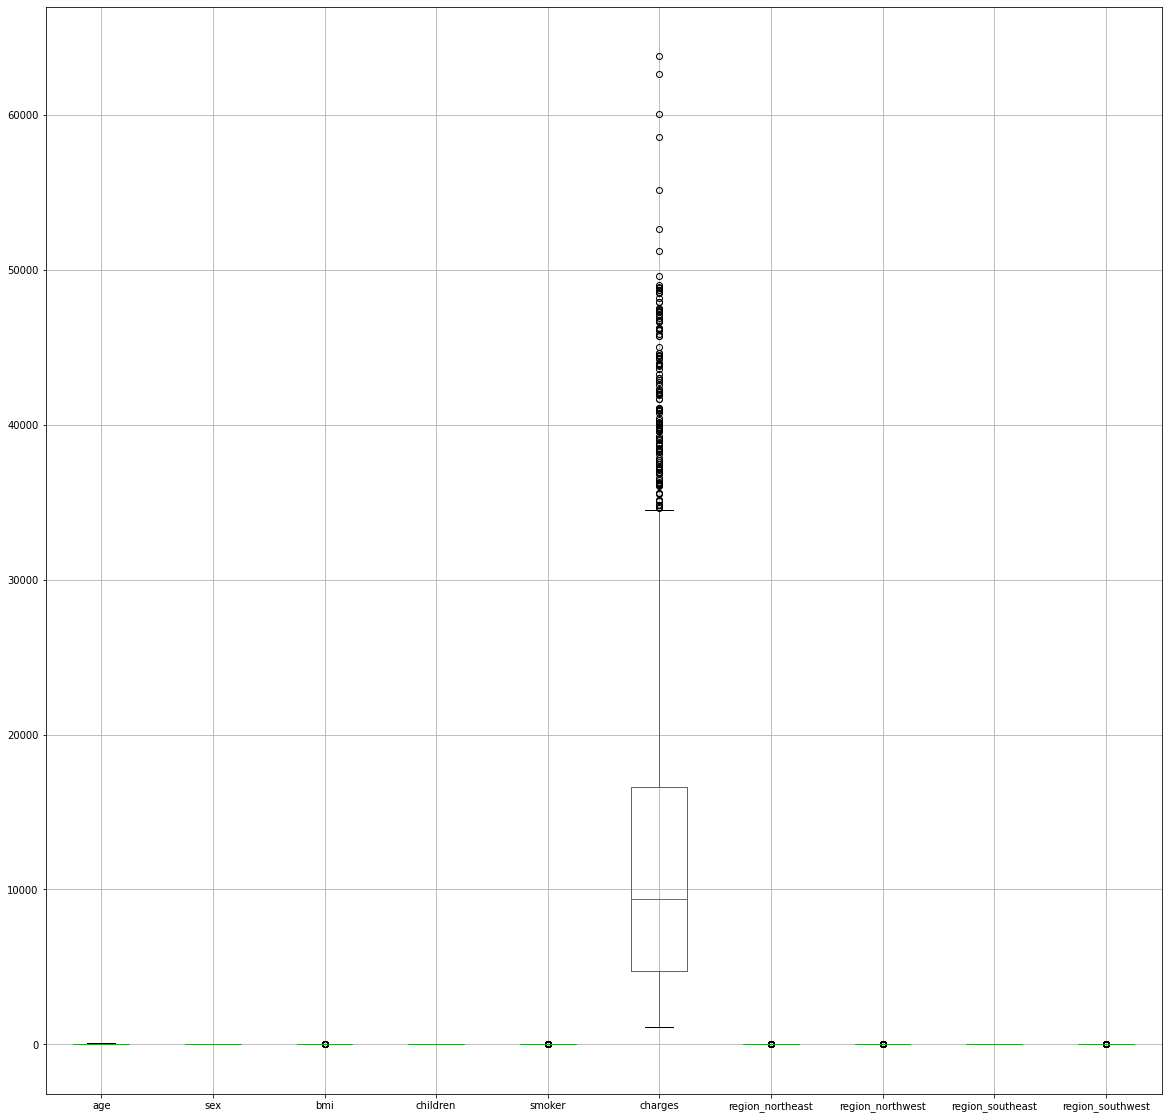

In [25]:
plt.figure(figsize=(20,20))
df.boxplot()

In [26]:
df.corr()[['charges']]

,charges
age,0.299008
sex,-0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
charges,1.000000
region_northeast,0.006349
region_northwest,-0.039905
region_southeast,0.073982
region_southwest,-0.043210


<AxesSubplot: >

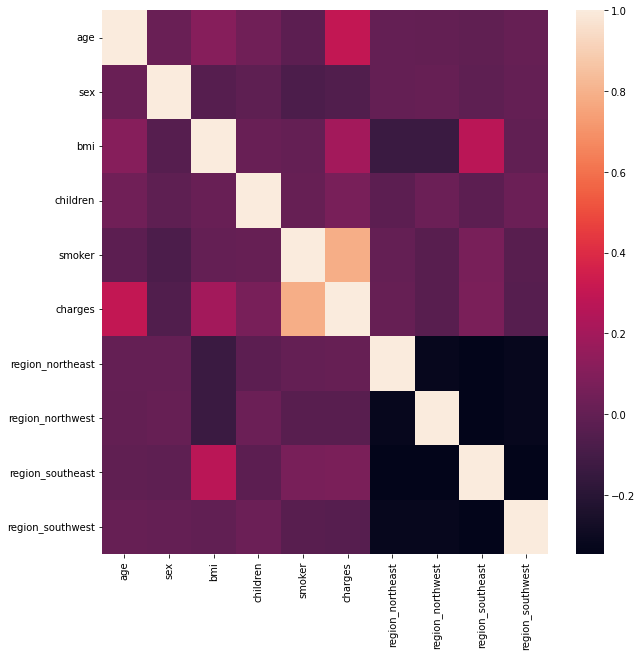

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [29]:
x=df.drop('charges',axis=1)
x
y=df[['charges']]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [30]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [31]:
q1 = df['charges'].quantile(0.25)
q2 = df['charges'].quantile(0.50)
q3 = df['charges'].quantile(0.75)
median = df['charges'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 4740.28715
Q2 : 9382.033
Q3 : 16639.912515
Median : 9382.033
upper_tail : 34489.350562499996
lower_tail : -13109.1508975


<AxesSubplot: >

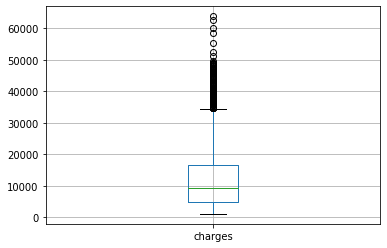

In [32]:
df[['charges']].boxplot()

In [33]:
df[['charges']].loc[df['charges'] > upper_tail]

,charges
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
...,...
1300,62592.87309
1301,46718.16325
1303,37829.72420
1313,36397.57600


In [34]:
df[['charges']].loc[df['charges'] < lower_tail]

,charges


<AxesSubplot: >

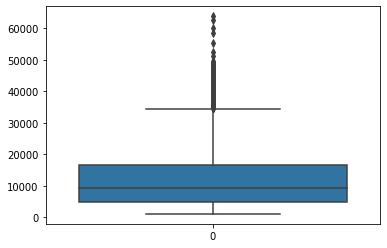

In [35]:
sns.boxplot(df['charges'])

In [36]:
x=df.drop("charges",axis=1)
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [37]:
y=df["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


<AxesSubplot: >

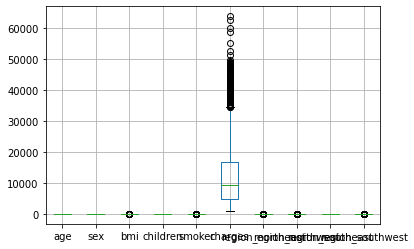

In [39]:
df.boxplot()

### Split train and test data 

In [40]:
x = df.drop("charges",axis=1)
y = df["charges"]

In [41]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [42]:
model = LinearRegression()
model

LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [44]:
y_pred = model.predict(x_test)
y_pred[:5]

array([ 8662.89282368,  6261.49430899, 15331.32709195, 11299.02497638,
        4104.16941974])

In [45]:
y_test[:5]

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
Name: charges, dtype: float64

In [46]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 36800107.88801568
RMSE : 6066.309247641079
MAE : 4226.647664219917
R Squared : 0.7166124432331717


In [47]:
# training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 36576361.89065711
RMSE : 6047.839439887364
MAE : 4175.618401731289
R Squared : 0.7618780003618578


#### Predict charges on the basis of single row

In [48]:
column_names = x.columns
len(column_names)

9

In [49]:
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [50]:
x.head(1).T

,0
age,19.0
sex,1.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [51]:
# input from user 
age = 60
sex =  'male'
bmi = 22
children = 2
smoker = 'yes'
region = 'southeast'

In [52]:
print(sex_value)
print(smoker_value)
print(column_names)

{'male': 0, 'female': 1}
{'yes': 0, 'no': 1}
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [53]:
json_data = {'sex':sex_value,'smoker':smoker_value,'columns':list(column_names)}
json_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [54]:
# columns
region ='region_'+region
region

'region_southeast'

In [55]:
region_index = np.where(column_names == region)[0][0]
region_index

7

In [56]:
array = np.zeros(x.shape[1],dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
array[0] = age 
array[1] = json_data['sex'][sex]
array[2] = bmi
array[3] = children
array[4] = json_data['smoker'][smoker]
array[region_index] = 1
print(array)

[60  0 22  2  0  0  0  1  0]


In [58]:
model.predict([array])[0]

10929.669772785903

In [63]:
import json

with open("medical_data.json",'w') as f:
    json.dump(json_data,f)


In [68]:
import pickle

with open("medical_model.pkl",'wb') as f:
    pickle.dump(model,f)

In [69]:
pip install flask